In [22]:
import pandas as pd
import numpy as np
import os

# 👇 Change working directory
os.chdir(r"C:\Users\hanif\Desktop\New folder\nifomohad-solar-challenge-week0")

from src.util import detect_outliers_zscore
import matplotlib.pyplot as plt


# Loading Dataset

In [24]:
benin="./data/benin-malanville.csv"
df = pd.read_csv(benin)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

# Summery of the statistics

In [73]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,241.958821,167.441866,116.993033,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,330.101787,261.547532,157.463619,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


# Missing Value Report

In [23]:
df.isna().sum()  # check for missing values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [31]:
(df.isna().sum() / len(df) ) * 100 # percentage of missing values in the dataset
# The comments column has 100% missing values,  >5%

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

# Incorrect entries and Outlier detection

In [33]:
# GHI, DNI, DHI should not be negative
negative_values = df[(df["GHI"] < 0) | (df["DNI"] < 0) | (df["DHI"] < 0)]
negative_values

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


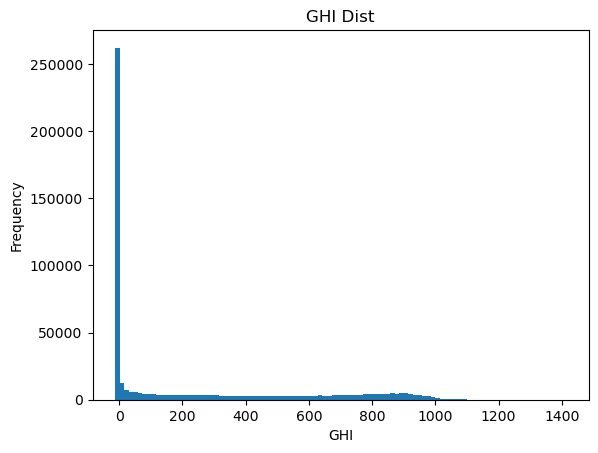

In [35]:
# since about 50% of the data has incorrect values for GHI, DNI, DHI, I will visualize them incase they are night time noise
import matplotlib.pyplot as plt

plt.hist(df["GHI"], bins=100)
plt.title("GHI Dist")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

In [39]:
# if most negative values are close to zero, we can assume they are night time noise and set them to zero
# those whose GHI > -10 are changed to 0 while those greater than are removed
df.loc[df["GHI"] < 0 & (df["GHI"] > -10), "GHI"] = 0
df = df[df["GHI"] >= -10]

In [41]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,0.0,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,0.0,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,0.0,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,0.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,0.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,0.0,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,0.0,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,0.0,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,0.0,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [43]:
# doing the same for the DNI and DHI
df.loc[df["DNI"] < 0 & (df["DNI"] > -10), "DNI"] = 0
df.loc[df["DHI"] <0 & (df["DHI"] > -10), "DHI"] = 0

df = df[df["DNI"] >= -10]
df = df[df["DHI"] >= -10]

In [45]:
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,0.0,0.0,0.0,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [47]:
(df[["GHI", "DNI", "DHI"]] < 0).sum() # cleaned

GHI    0
DNI    0
DHI    0
dtype: int64

In [49]:
# humidity has to be between 0 and 100, so we will remove those outside this range
df = df[(df["RH"] >= 0) & (df["RH"] <= 100)]

In [51]:
# Outlier detection for sensor readings (ModA, ModB) and wind speed data (WS, WSgust).
# using z-score method
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
outlier_rows = detect_outliers_zscore(df, cols_to_check)
print(f"Number of rows with outliers: {outlier_rows.sum()}")

# remove outliers
df_clean = df[~outlier_rows].copy()



Number of rows with outliers: 7893


In [53]:
df_clean

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,0.0,0.0,0.0,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


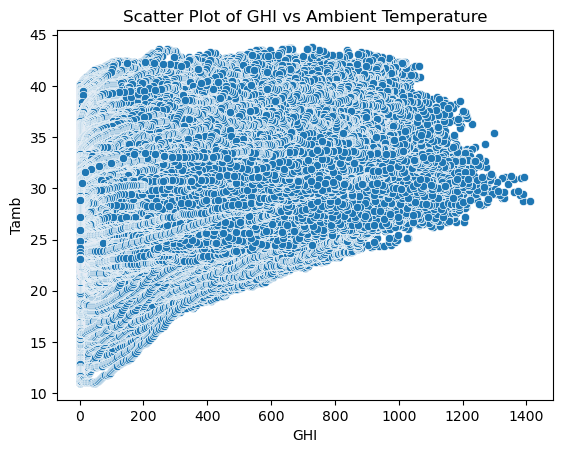

In [55]:
import seaborn as sns
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('Scatter Plot of GHI vs Ambient Temperature')
plt.show()

In [ ]:
# 'Comments' column is currently all NaN; left unchanged for completeness

(array([1.5400e+02, 2.1200e+02, 5.6200e+02, 9.1100e+02, 1.2450e+03,
        2.3290e+03, 3.5320e+03, 3.9940e+03, 5.2280e+03, 6.1520e+03,
        7.6690e+03, 7.2530e+03, 6.6120e+03, 7.3820e+03, 6.5850e+03,
        7.1130e+03, 6.5200e+03, 7.9920e+03, 1.1204e+04, 1.4585e+04,
        2.1877e+04, 1.7835e+04, 2.0073e+04, 1.8762e+04, 1.8168e+04,
        1.7725e+04, 1.4653e+04, 1.2460e+04, 1.0244e+04, 9.7680e+03,
        1.0453e+04, 7.5580e+03, 7.0360e+03, 6.4120e+03, 5.7510e+03,
        6.2310e+03, 5.0640e+03, 4.4010e+03, 4.5700e+03, 4.1770e+03,
        5.0850e+03, 4.4670e+03, 4.4080e+03, 4.5500e+03, 4.4940e+03,
        5.2390e+03, 4.3260e+03, 4.7540e+03, 4.9100e+03, 4.7690e+03,
        5.4910e+03, 4.7970e+03, 5.0860e+03, 5.0930e+03, 5.2990e+03,
        6.0580e+03, 5.5200e+03, 5.3230e+03, 5.2060e+03, 5.3910e+03,
        5.6620e+03, 4.7580e+03, 4.3740e+03, 4.4240e+03, 4.1330e+03,
        4.9700e+03, 4.2620e+03, 3.8440e+03, 3.9080e+03, 3.6960e+03,
        4.1330e+03, 3.5180e+03, 3.2300e+03, 2.94

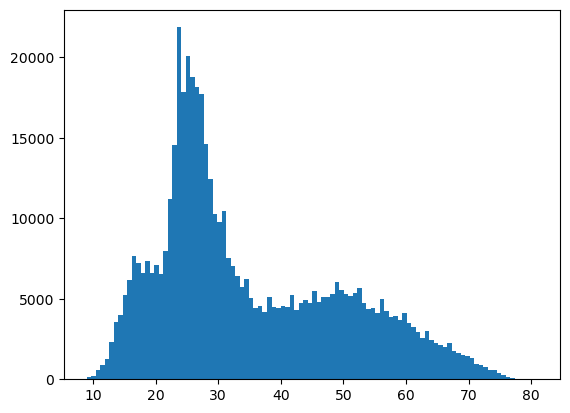

In [57]:
# checking if temperature is realistic
plt.hist(df_clean["TModA"], bins=100)

In [60]:
# benin dataset looks clean now after removing negative values and outliers
# Export the clean dataset
df_clean.to_csv("./data/benin_cleaned.csv", index=False)

# Time Series Analysis

In [62]:
df_clean = pd.read_csv("./data/benin_cleaned.csv")

C:\Users\hanif\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


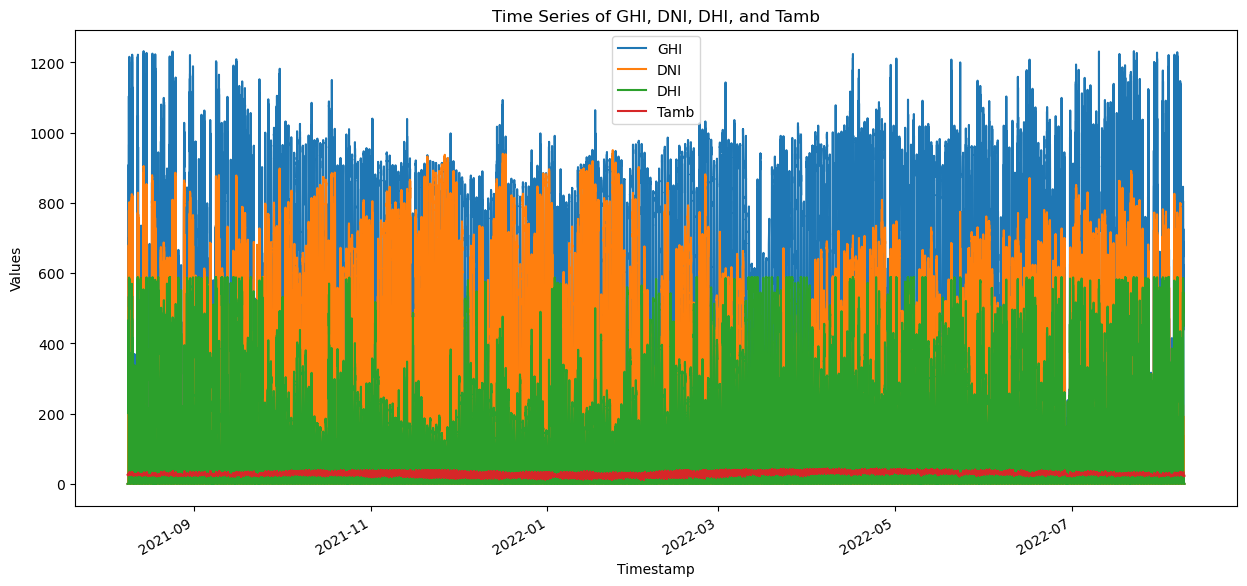

In [64]:
# Line chart of GHI, DNI, DHI, Tamb vs. Timestamp.
clean_df = df_clean.copy()
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\hanif\AppData\Local\Temp\ipykernel_8908\3776864059.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean.resample('M').mean()


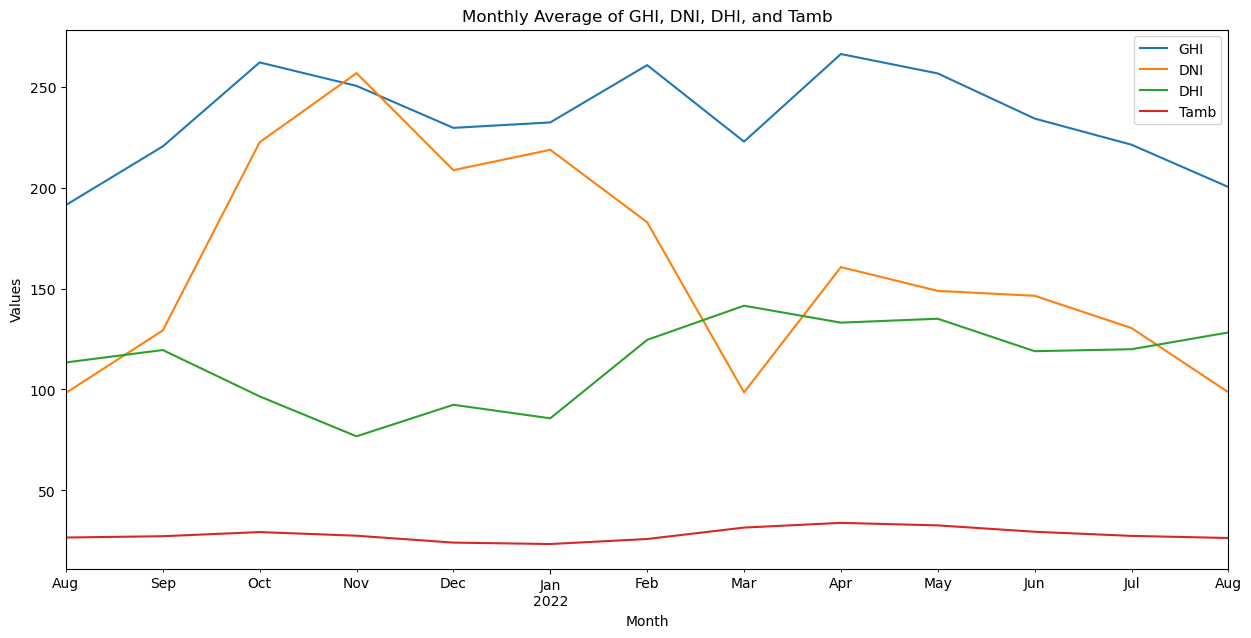

In [68]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
# This can help identify seasonal variations or unusual weather events affecting solar energy generation.
monthly_avg = df_clean.resample('M').mean()
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.show()

# Cleaning Impact

In [70]:
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean.
# Cleaning Impact
df_raw = pd.read_csv("./data/benin-malanville.csv")
df_cleaned = pd.read_csv("./data/benin_cleaned.csv")

comp = pd.DataFrame({
    "dataset": ['Raw', 'Cleaned'],
    'ModA': [df_raw['ModA'].mean(), df_cleaned['ModA'].mean()],
    'ModB': [df_raw['ModB'].mean(), df_cleaned['ModB'].mean()]
})

comp

,dataset,ModA,ModB
0,Raw,236.589496,228.883576
1,Cleaned,232.241606,224.882352


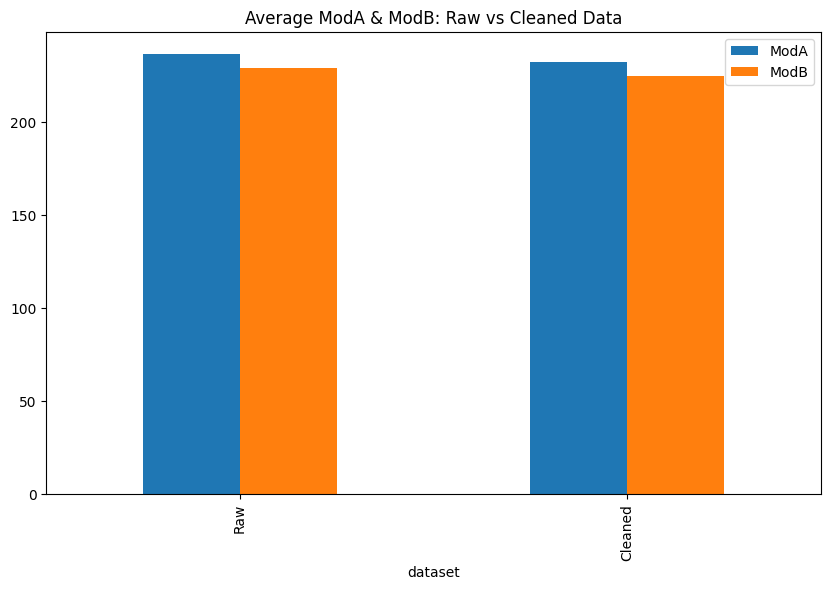

In [9]:
comp.set_index('dataset').plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA & ModB: Raw vs Cleaned Data')
plt.show()

In [10]:
# decrease in the ModA and ModB readings after cleaning, indicating that outliers were inflating the average values in the raw dataset.

#  Correlation & Relationship Analysis

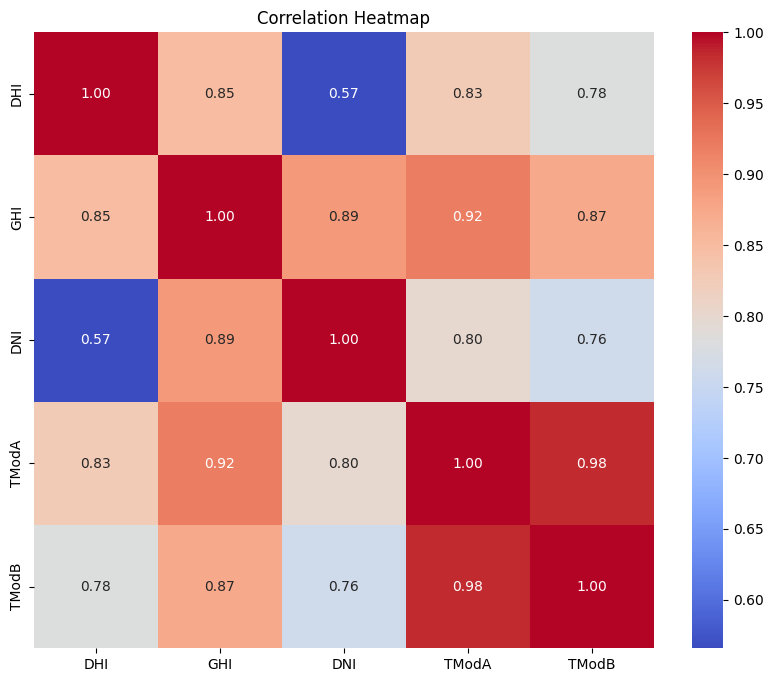

In [13]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
import seaborn as sns
corr = df_clean[["DHI", "GHI", "DNI", "TModA", "TModB"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

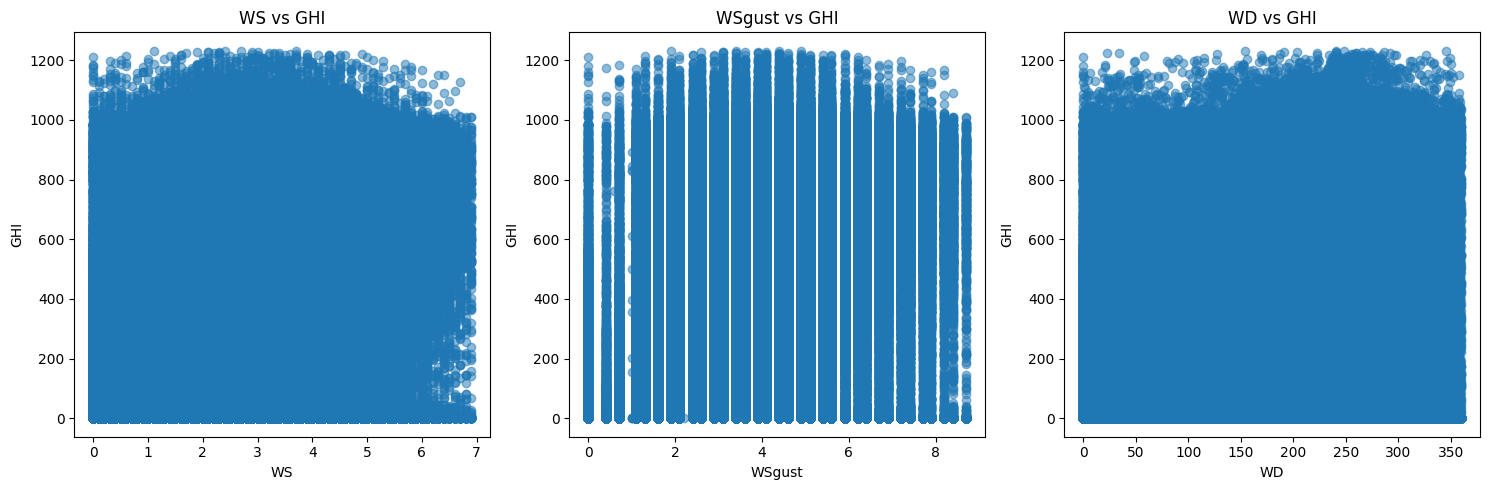

In [ ]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5)
plt.title('WS vs GHI')
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1, 3, 2)
plt.scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.5)
plt.title('WSgust vs GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1, 3, 3)
plt.scatter(df_clean['WD'], df_clean['GHI'], alpha=0.5)
plt.title('WD vs GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()

plt.show()

# Wind & Distribution Analysis

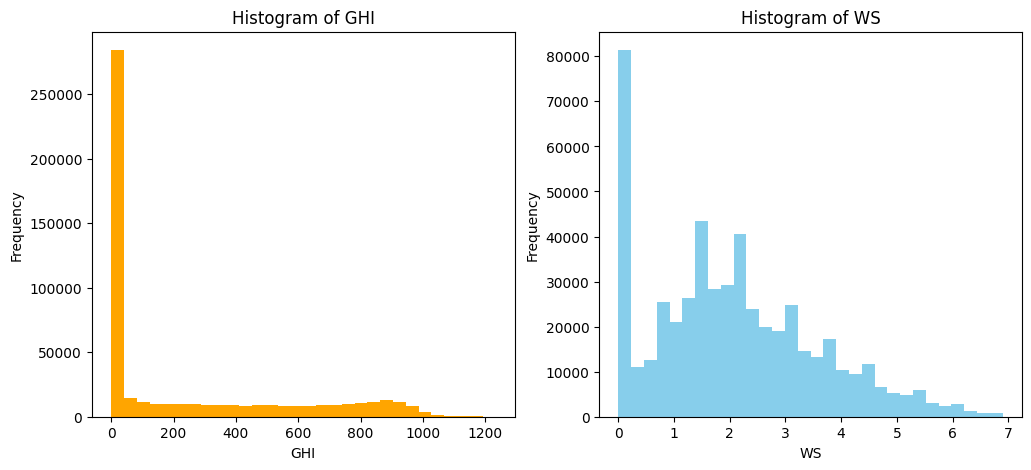

In [42]:
# histogram of GHI and WS
plt.figure(figsize=(12, 5))

# histogram of GHI
plt.subplot(1, 2, 1)
plt.hist(df_clean["GHI"], bins=30, color="orange")
plt.title("Histogram of GHI")
plt.xlabel("GHI")
plt.ylabel("Frequency")

# Historam for WS
plt.subplot(1, 2, 2)
plt.hist(df_clean["WS"], bins=30, color="skyblue")
plt.title("Histogram of WS")
plt.xlabel("WS")
plt.ylabel("Frequency")

plt.show()


# Temperature Analysis

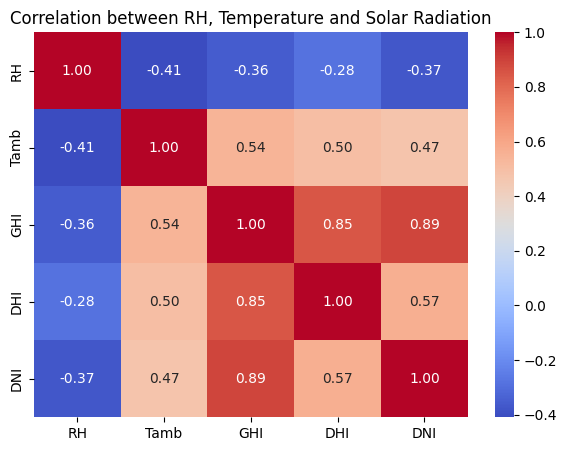

In [44]:
# Correlation matrix for RH, Tamb and Solar metrics
corr = df_clean[['RH', 'Tamb', 'GHI', 'DHI', "DNI"]].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between RH, Temperature and Solar Radiation")
plt.show()

In [ ]:
# A negative correlation between RH and GHI/DNI/DHI → means high humidity tends to reduce solar radiation (cloudier or moist air scatters sunlight).
# A negative correlation between RH and Tamb → higher humidity often corresponds to lower temperature 

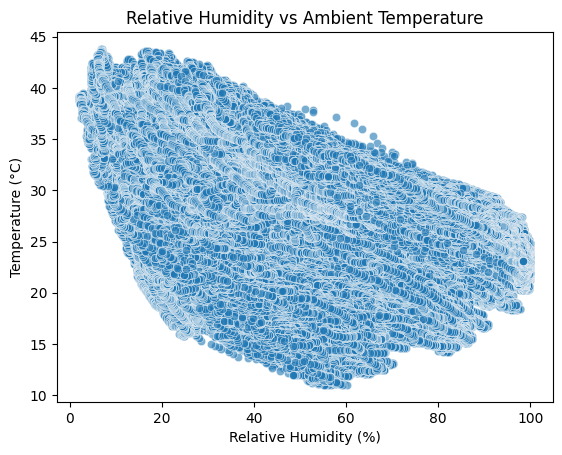

In [ ]:
# RH vs Temperature
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.6)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()

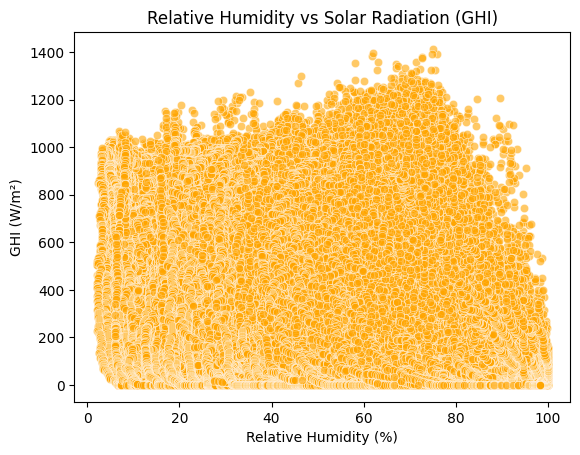

In [48]:
# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.6, color='orange')
plt.title('Relative Humidity vs Solar Radiation (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()

# Bubble Chart

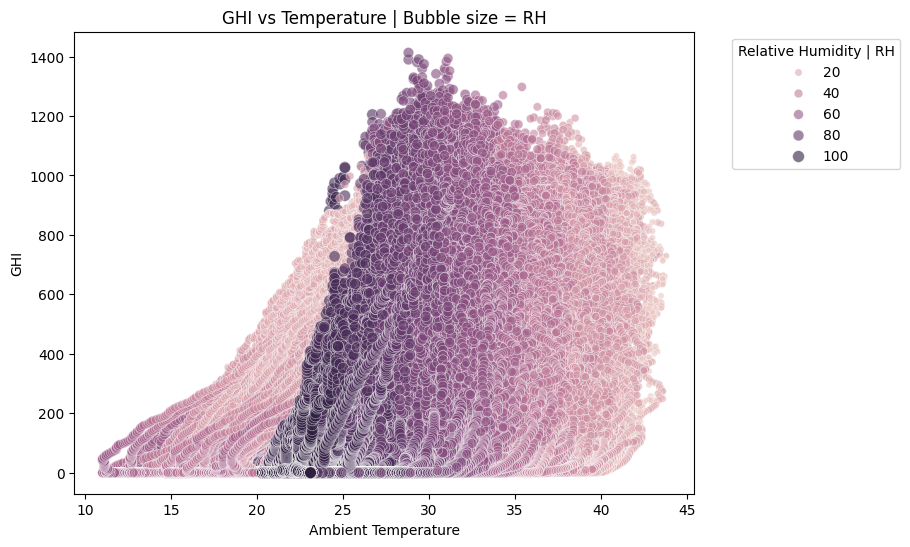

In [51]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Tamb",
    y="GHI",
    size="RH",
    hue='RH',
    alpha=0.6,
)
plt.title("GHI vs Temperature | Bubble size = RH")
plt.xlabel("Ambient Temperature")
plt.ylabel("GHI")
plt.legend(title="Relative Humidity | RH", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
